# Multimodal RAG

In this model we will learn to build systems that process text, audio, and images enabling AI to create coherent, context-aware content, this is the power of Multimodal RAG. By the end of this section, you'll have hands-on experience with multimodal RAG.

We will explore the cutting edge of AI integrating text, images, and audio to create rich, contextually relevant outputs.

## Learning objectives and outcomes

* Master multimodal integration (How to combine various types of data)
* Build Real-World Applications
* Leverage Advanced AI Models
* Implement Constrastive Learing (This is when we are trying to see what kind of text is simillar to what kind of images. This allowes us to find tune our RAG models)
* Create Interactive AI Systems (Based on what we have, a video for example we are able to create a RAG system out of it)

By the end of this module we will have practical experience in creating AI systems that use multiple data types for more nuanced outputs.



Introduction to Multimodal RAG

Imagine you need to create a marketing project from multiple data sources. You dont have the time to dig through all these formats. You need a toll that pulls it all together fast. This is were Multimodal and GenAI comes in. Multimodal AI models generate content across multiple data types simultaneously.

This is multi-tasking.

Just like expert multitaskers, processing it all simultaneously, just like a humna would.

How it works...
you provide text, images, video or audio and then the model processes each typ eof data through speciallized neural networks:
* text -> NLP techniques
* images -> convolutional neural networks
* videos -> frame by frame
* audio -> Spectograms
The AI processes and combines data to create unified marketing strategy.

The main challenge is:

Integrating Multimodal Capabilitites into RAG systems

Retrival + Generation

In a Multimodal RAG, retrieves and generates content from multiple data types, enhancing context-aware responses.

We will focus on retriving images and audio and generating text.

Instead of providing isolated pieces of information, Multimodal RAG retrieves the most relevant insights from customer feedback videos, photos, etc, and generates comprehensive reports that offeres complete understanding of the market.

Rag system must evaluate and blend data sources to produce a comprehensive, accurate output.




Setup and Video Processing

# Step 1 - Setup

In [1]:
from google.colab import userdata
api_key = userdata.get('genai_course')

In [2]:
%cd /content/drive/MyDrive/Ideas/GenAI/RAG/Multimodal RAG

/content/drive/MyDrive/Ideas/GenAI/RAG/Multimodal RAG


# Step 2 - Get Data

In [3]:
# Define the Video Path
# The video Im going to use
video_path = ('Manage_Your_Time_More_Effectively.mp4')

Extracting Audio from Video

# Step 3 - Extract the Audio and Compress

In [4]:
# Install libraries
!pip install -q pydub
!apt-get install -q ffmpeg

Reading package lists...
Building dependency tree...
Reading state information...
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [5]:
# Import libraries
import os
import subprocess
from pydub import AudioSegment

/usr/local/lib/python3.12/dist-packages/pydub/utils.py:300: SyntaxWarning: invalid escape sequence '\('
  m = re.match('([su]([0-9]{1,2})p?) \(([0-9]{1,2}) bit\)$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:301: SyntaxWarning: invalid escape sequence '\('
  m2 = re.match('([su]([0-9]{1,2})p?)( \(default\))?$', token)
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:310: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(flt)p?( \(default\))?$', token):
/usr/local/lib/python3.12/dist-packages/pydub/utils.py:314: SyntaxWarning: invalid escape sequence '\('
  elif re.match('(dbl)p?( \(default\))?$', token):


In [6]:
# Define the audio path
audio_output_path = 'audios/output.mp3'

In [ ]:
output_dir = os.path.dirname(audio_output_path)
output_dir

'audios'

In [7]:
# Ensure the output directory exists
output_dir = os.path.dirname(audio_output_path)
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [8]:
# Ensure the output file has the correct extension
if not audio_output_path.endswith('.mp3'):
  audio_output_path += '.mp3'

In [9]:
# Construct the ffmpeg to extract the audio
command = [
    'ffmpeg',
    '-y', # overwrites if the audio exists
    '-i', video_path, # input file
    '-vn', # no video
    '-acodec', 'libmp3lame', # Audio codecs
    audio_output_path
]

In [10]:
# Execute the command to extract the audio
subprocess.run(command, check = True)

CompletedProcess(args=['ffmpeg', '-y', '-i', 'Manage_Your_Time_More_Effectively.mp4', '-vn', '-acodec', 'libmp3lame', 'audios/output.mp3'], returncode=0)

Compressing Audio Files

In [11]:
# Set the bitrate
bitrate = '32k' # more information will have more tokens

In [12]:
# Set path for compressed audio
compressed_audio_path = "audios/compressed.mp3"

In [13]:
# Construct the ffmpeg command to compress the audio
command = [
    'ffmpeg',
    '-y', # Overwrite if needed
    '-i', audio_output_path,
    '-ab', bitrate,
    compressed_audio_path
]
subprocess.run(command, check = True)

CompletedProcess(args=['ffmpeg', '-y', '-i', 'audios/output.mp3', '-ab', '32k', 'audios/compressed.mp3'], returncode=0)

Transcribing Audio with OpenAI Whisper

# Step 4 - Transcribe Audio using OpenAI API

In [14]:
!pip install -q openai

In [15]:
# Library
from openai import OpenAI

In [16]:
# Connect the script to the API
client = OpenAI(api_key = api_key)

In [17]:
# Open the compressed file in binary mode
with open(compressed_audio_path, 'rb') as file:
  # Use the Whisper model to transcribe
  transcript = client.audio.transcriptions.create(
      model = 'whisper-1',
      file = file
  )

Now we want to the writing of the transcription, because now we have the transcription, and now we want to export the transcription

In [18]:
# Inspect the transcript
transcript.text

"Let me tell you a quick story. Back when I was in high school, our teacher wanted us to write an essay. But because it was supposed to be a longer paper, he gave us one whole month to finish it. I was a massive procrastinator back then and since the deadline was so far away, I didn't even think about starting writing yet. Instead, I decided my time was better spent playing video games. Days passed and the deadline was coming closer and closer, but I hadn't written a single word. About two days before we had to turn in our essay, I realized the deadline was so close that I might not be able to finish in time. This is when I went into full-on panic mode. With only two days left, I started writing with pure focus. Writing that paper became my number one priority and everything else became secondary. I didn't think about video games or anything else. All of my focus was on that essay. Thankfully in the end, I managed to finish and turn in my paper in time. And to top it off, I also got a 

In [19]:
# Define the path where the transcription will be saved
transcript_path = 'transcripts/transcript.txt'

In [20]:
# Ensure the output directory exists
output_dir = os.path.dirname(transcript_path)
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [21]:
# Save the transcribed text to a file
with open(transcript_path, 'w') as file:
  file.write(transcript.text) # .text is the attribute from transcription

In [ ]:
# Save the transcribe text without using "with"
# file = open(transcript_path, 'w')
# file.write(transcript.text)
# file.close()

Whisper Model

# Whisper Model

The Whisper model excels in speech recognition, managing accents, languages, background noise, and transcribing conversations accurately.
The whisper model is when IA can diferentiate between multiple speakers.

The Whisper mode converts audio into a detailed spectogram, using neural network techniques to process speech patterns and generating text transcriptions, even in noisy or multilingual enviroments.

## How this journey starts?

It starts by converting audio into Log-mel spectogram, turning sound into a visual format that the AI can analyze, allowing it to capture the nuances of speech, such as tones and pauses. **Instead of just listening to the audio WHISPER transform the soud into an image that captures different frequecys over time.**

Next, using ID Convolutional Layers followed by the GELU activation, Whisper detects local patterns in the spectogram, such as phonemes and accents, enabling the model to distinguish between different voices and pronunciations. After the layer comes this Sinusoidal Positional Encoding adds context about the oreder of audio features, helping Whisper undestand the sequence of sounds and ensuring accurate representation of temporal information in speech.

The Encoder Blocks in Whisper further process the audio features with layers of attention and normalization, building a detailed understanding of the audio's structure, including intonation and emphasis, for precise transcription.

The Cross-Attention Mechanism bridges the audio representations from the encoder blocks with the text tokens generated by the decoder, ensuring each word aligns with the audio content for coherent and contextually accurate transcription.

## Summarize at this point...

Whisper begins by converting audio into spectogram (this is a visual representation -> sound waves into an image format), using convolutional layers to extract critical features and positional encoding to maintain the tempral order, which helps the mode understand the nuances and sequence of speech.

The Whisper model starts by transforming audio input into a visual representation called LogMel Spectogram, this step allows the model to covnert sound waves into an image format capturing the difference frequecys over time, using 1 dimensional convolutional neural networks whisper the text with code patterns, this is crucial for distinguish various voices and pronunsation. the model then applied sinousoidal possition encoding to maintain order of sounds. After initial processing, Whisper uses encoder blocks to further refine audio data, this blocks applied layers of attention and normalization to build a detailed understanding of the audios structure. The key innovation in Whisper is its cross-attention machanism, wich acts as a bridge between the encoded audio data and the text-generation process in the decoder.

## Next up...

We have the **Decoder blocks** use refined audio data to predict and generate text sequentially, ensuring accuracy and coherence in transcription.

Whisper's multi-task earning enables it to perform various functions beyond transcription, such as translation and sentiment analysis, making it versatile across applications.

Finally, Whisper's training on diverse audio samples allows it to handle different accents, languages, and noisy eviroments effectively, enhancing its robustness and reliability.



Step 5 - Extract Frames from video

In [22]:
!pip install -q moviepy

In [23]:
# Load Library
from moviepy.editor import VideoFileClip

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



In [24]:
# Define output filder
output_folder = 'frames'
if not os.path.exists(output_folder):
  os.makedirs(output_folder)

In [25]:
# Load video
video = VideoFileClip(video_path)

WIP

In [28]:
interval = 10
range(0, int(video.duration), interval)

range(0, 394, 10)

In [29]:
# Extract the frames
frame_paths = []
interval = 10 # 1 frame per 10 seconds
for t in range(0, int(video.duration), interval):
  frame_path = os.path.join(output_folder, f'frame_{t:04d}.png')
  # Save the frame at the specified time
  video.save_frame(frame_path, t)
  frame_paths.append(frame_path)

Introduction to Contrastive Learning

# Contrastive Learning

Helps align different types of data, helping AI generate more contextually relevant content. It's like teaching AI to process both images and audio.

## The Core Concept of Contrastive Learning in Multimodal Data

Contrative learning trains AI to distinguish similar and dissimilar data across modalities. For example, match the tone of a conversation with a corresponding facial expresion in a photo.
Learning these associations helps the model generate coherent response across different inputs.

## Applying Contrastive Learning in Decision-Making

In this course, contrastive learning pairs audio with images, helping AI differentiate between intuitive and analytical thinking.

## Understanding the Contrastive Learning Diagram

* Positive pair, contrastive learning helps the model align similar audio and visual representations, teaching it that intuitive audio and familiar visuals often match, enhancing future context understanding.

* Negative pair, contrastive learning teaches the model to separate dissimilar audio and visuals. It learns that analytical audio and complex visuals should not match intuitive context, aiding in distinguishing different decision-making types.

## How Contrastive Learning Enhances Multimodal RAG Systems

Training these pairs helps contrative learining teach the AI the nuanced relationships between audio and visual data in decision-making. This training helps the model make more accurateresponse , like knwing when to use quick decisions versus detailed analysis.

## Broader Implications for Multimodal Applications

Contrastive learning in multimodal RAG systems boosts performance across various applications.

## Summary

* Contrastive learning enhances model's integration of multimodal data by aligning or differentiating it based on context.

* In our example, the model refines its understanding by adjusting distance between similar and dissimilar audio and image pairs.

* Contrastive learning transforms multimodal RAG systems, enabling AI to handle complex, diverse inputs more effectively.

Understanding the CLIP Model

# Contrasting Language Image Pre-Training

This model was develop by OpenAI.

It is design to understand and relate image and text without needing traditional task specific with fine tuning.

This makes CLIP versatile, enabling it to recognize unseen objects in images through text descriptions. It can recognize objects in images it has never seen before just by understanding the text description.

## Overview of CLIP's Contrastive Pre-training

CLIP traing on a large dataset of images and text, learning to match the right description with each image while distinguishing it from incorrect ones though contrastive learning.

This has two enocders, one for text, converting 'pepper the aussie pup' into a text embedding, and one for  images. CLIP align embedding for correct text-image pairs while separating incorrect ones, enabling it to match text and emages effectively.

CLIP learns to match text and images by minimizing the distance between the correct image-text pairs and maximizing the distance between incorrect ones, allowing it to understand the relation ship between modelities.

As a key idea CLIP matches text with images.

## Creating a Dataset Classifier from Label Text

Imagine you have different dataset, Planes, Cars, Dogs and Birds. With CLIP, you just have to decribe the categories in natural language. The model maches text and image embeddings identifying the closes image as the correct category.

## Zero-Shot Prediction with CLIP

This means that CLIP can recognize objects and classify images that has not seen before. Model recognizes the image as a photo of a dog, despite not being trained on it. That means we don't need to train.

CLIP's zero-shot prediction capability allows it to classify new, unseen images based on their aligment with text descriptions, showcasing its remarkable generalization ability.

## Summary

CLIP uses contrastive learning to create strong representations of text and images, enabling it to match different modalities and identify objects from text descriptions or natural language labels.


Tokenizing Text for Multimodal Tasks

# Step 6 - Embedding audio

https://github.com/openai/CLIP

In [30]:
!pip install --upgrade transformers huggingface-hub

In [31]:
# Import libraries
from transformers import CLIPProcessor, CLIPModel, CLIPTokenizer
import torch
import numpy as np

In [32]:
# Load the model, Processor and Tokenizer
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')
tokenizer = CLIPTokenizer.from_pretrained('openai/clip-vit-base-patch32')

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [33]:
# Get the transcribed text (loading the one we saved)
with open(transcript_path, 'r') as file:
  transcript_text = file.read()

In [34]:
transcript_text

"Let me tell you a quick story. Back when I was in high school, our teacher wanted us to write an essay. But because it was supposed to be a longer paper, he gave us one whole month to finish it. I was a massive procrastinator back then and since the deadline was so far away, I didn't even think about starting writing yet. Instead, I decided my time was better spent playing video games. Days passed and the deadline was coming closer and closer, but I hadn't written a single word. About two days before we had to turn in our essay, I realized the deadline was so close that I might not be able to finish in time. This is when I went into full-on panic mode. With only two days left, I started writing with pure focus. Writing that paper became my number one priority and everything else became secondary. I didn't think about video games or anything else. All of my focus was on that essay. Thankfully in the end, I managed to finish and turn in my paper in time. And to top it off, I also got a 

In [36]:
# Tokenize the entire text
tokens = tokenizer(transcript_text,
                   return_tensors = 'pt', # PyTorch
                   padding = True)

In [42]:
tokens['input_ids'][0]

tensor([49406,  1094,   614,  ...,  1926,   269, 49407])

In [43]:
tokens['input_ids'][0].shape

torch.Size([1222])

In [44]:
tokens = tokens['input_ids'][0]
print(f'The number of tokens is {len(tokens)}')

The number of tokens is 1222


Chunking and Embedding Text


In [45]:
# WIP
max_tokens = 77
for i in range(0, len(tokens), max_tokens):
  print(i)
  print(i + max_tokens)

0
77
77
154
154
231
231
308
308
385
385
462
462
539
539
616
616
693
693
770
770
847
847
924
924
1001
1001
1078
1078
1155
1155
1232


In [46]:
# The CLIP model requires 77 tokens per chunk
max_tokens = 77
transcription_chunks = []

for i in range(0, len(tokens), max_tokens):
  chunk = tokens[i:i + max_tokens]
  transcription_chunks.append(chunk)

print(f'The number of chunks is {len(transcription_chunks)}')

The number of chunks is 16


In [47]:
# Inspect the transcription_chunks
transcription_chunks

[tensor([49406,  1094,   614,  2330,   592,   320,  3712,  1134,   269,   893,
           827,   328,   739,   530,  1400,  1228,   267,   581,  4008,  3146,
           718,   531,  4946,   550, 12751,   269,   767,  1631,   585,   739,
          9119,   531,   655,   320,  5349,  2802,   267,   797,  3485,   718,
           637,  2954,  1924,   531,  3958,   585,   269,   328,   739,   320,
          4818, 25586,  1962,   893,  1594,   537,  1855,   518,  8458,   739,
           706,  2384,  1520,   267,   328,  2376,   713,  1427,  1331,   781,
          2530,  2979,  2296,   269,  4191,   267,   328]),
 tensor([ 4939,   607,   788,   739,  1539,  4429,  1629,  1455,  1955,   269,
          1161,  4957,   537,   518,  8458,   739,  1171,  6377,   537,  6377,
           267,   767,   328, 21480,   713,  5231,   320,  2688,  2653,   269,
           781,  1237,  1161,  1348,   649,  1100,   531,  2105,   530,   581,
         12751,   267,   328, 10489,   518,  8458,   739,   706,  2660,

In [48]:
# Text Embeddings -> embed the tokens in each chunk
text_embeddings = []

inputs = {'input_ids': transcription_chunks[0].unsqueeze(0)}
with torch.no_grad():
  text_embedding = model.get_text_features(**inputs)
  text_embeddings.append(text_embedding.cpu().numpy().flatten())
text_embeddings # This is what enable us to then we will compare everything
# that is in this text embedding, so these are numerical representation with our data
# and we are going to compare this embeddings from the text,
# to the embeddings that are in te images
text_embedding_np = np.array(text_embeddings)
text_embedding_np.shape

(1, 512)

In [50]:
text_embeddings = []

for chunk in transcription_chunks:
  inputs = {'input_ids': chunk.unsqueeze(0)}
  with torch.no_grad():
    text_embedding = model.get_text_features(**inputs)
    text_embeddings.append(text_embedding.cpu().numpy().flatten())

# Convert the list of embeddings to numpy array
text_embedding_np = np.array(text_embeddings)

# Print the shape
print(f'Text embedding shape: {text_embedding_np.shape}')

Text embedding shape: (16, 512)


In [52]:
# Inspect the text embeddings np
text_embedding_np

array([[ 0.02291096,  0.06127312, -0.10674023, ...,  0.18032408,
         0.03520007,  0.00395092],
       [-0.0360107 , -0.1759705 ,  0.20541455, ..., -0.13530737,
        -0.0612523 , -0.21653835],
       [-0.35866255, -0.2430767 ,  0.30022994, ..., -0.2549566 ,
         0.04722475,  0.18766618],
       ...,
       [-0.11354724,  0.57520556, -0.12419151, ..., -0.11370052,
        -0.3712482 ,  0.28736728],
       [ 0.049816  , -0.24555004, -0.3911397 , ..., -0.3152245 ,
        -0.13081318, -0.24662097],
       [ 0.0480199 ,  0.01267487,  0.22574721, ...,  0.19344135,
         0.5457551 , -0.07396935]], dtype=float32)

Embedding Images for Multimodal Analysis

Step 7 - Embedding the Images

Embedding: a numerical representation of the data.

In [53]:
from PIL import Image
import os

In [54]:
# Embed the images
frames_folder = 'frames'
image_embeddings = []
image_paths = []

for frame_file in os.listdir(frames_folder):
  if frame_file.endswith('.png'):
    frame_path = os.path.join(frames_folder, frame_file)
    image_paths.append(frame_path)

    # Load and preprocess the image
    image = Image.open(frame_path)
    inputs = processor(images = image, return_tensors = 'pt')

    # Generate the image embeddings
    with torch.no_grad():
      image_embedding = model.get_image_features(**inputs)
      image_embeddings.append(image_embedding.cpu().numpy().flatten())

# Convert the list of embeddings to a numpy array
image_embedding_np = np.array(image_embeddings)

# print the shape
print(f'Image embedding shape is {image_embedding_np.shape}')

Image embedding shape is (40, 512)


In [55]:
# Inspect the image_embedding_np
image_embedding_np

array([[-2.15779692e-01, -9.51196849e-02, -1.64511696e-01, ...,
         8.05660367e-01,  2.48602033e-03, -3.81479621e-01],
       [ 4.27376330e-02, -2.55217850e-02, -9.21354294e-02, ...,
         7.31883526e-01,  1.08861215e-01, -3.53350550e-01],
       [ 6.67246431e-03, -5.45433164e-01,  1.60078034e-02, ...,
         7.89810300e-01,  4.93866540e-02, -1.38644889e-01],
       ...,
       [ 1.55683115e-01,  2.32658103e-01, -1.46240473e-01, ...,
         7.73466885e-01,  3.02303970e-01, -5.95740557e-01],
       [ 1.72917441e-01, -6.05077863e-01,  9.00541469e-02, ...,
         1.33479387e-01, -1.99103385e-01, -4.91959304e-02],
       [-2.31712013e-01, -1.32151186e-01, -1.76966935e-01, ...,
         8.31785917e-01,  5.41552901e-04, -4.00663346e-01]], dtype=float32)

`<Observation>` In general what is happening is that we have this text embeddings wich have this features and this numerical representation of our data...We have this for the text and we have this for the images and what we are going to do now is, let's get this features from one and this features from the other one and let's take from the chunk text one, let's see wich is the most similar from all of our 15 frames, let's see wich one is the most simmilar and let's rank them. We want to have the most relevant chunk we the most relevant image.

Based on your `<observation>`, the topic is **Multimodal Search and Retrieval** (specifically, **Text-to-Image Retrieval**) using **Contrastive Embeddings**.

***

## Key Concepts in the Observation

The text describes a process directly derived from models like **CLIP** (Contrasting Language-Image Pre-training), which maps both text and images into a shared, dense vector space (embeddings).

Here's the breakdown of the logic:

1.  **Multimodal Embeddings:** "we have this **text embeddings**... and we have this for the **images**."
    * Both text chunks (likely captions, transcriptions, or descriptions) and images (video frames) are converted into **numerical representations** (vectors).

2.  **Similarity Search:** "let's take from the **chunk text** one, let's see wich is the **most similar** from all of our **15 frames**."
    * The goal is to find the closest match in the vector space between a single text vector (the "anchor" or query) and multiple image vectors (the database). This is done using distance metrics like **Cosine Similarity**.

3.  **Ranking and Retrieval:** "let's see wich one is the most simmilar and let's **rank them**. We want to have the most **relevant chunk we the most relevant image**."
    * The vectors are ranked by their similarity score, ensuring that the retrieved result is the most semantically relevant image frame for the given text chunk.

***

## Potential Application

This process is typically used for:

* **Video Search and Indexing:** Matching specific moments (frames) in a video to their corresponding text transcriptions or descriptions, enabling a search system to jump directly to the visual scene described by a query.
* **Retrieval-Augmented Generation (RAG) with Images:** Finding the most relevant visual evidence (images) for a given textual query to provide a complete, multimodal answer.

Understanding Cosine Similarity in Multimodal Contexts


# Cosine Similarity

Whether you are comparing text, images, even audio file, cosine similarity is powerfull and intuitive for understanding relationship between different types of data.

## The core idea behind Cosine Similarity

Cosine similarity measures the angle between two vectors in multi-dimensional space.

* The closer the vectors, the smaller the angle indicating greater similarity.

* If vectors point in different directions, the angle is large and cosine similarity is low.

* Cosine similarity captures simolarity by focusing on the direction not the magnitude of the vectors.

> Arrows in oppsite directions, large angle, and the cosine similarity is near -1, indicating dissimilarity.

> If the arrows are perpendicular, the cosine similarity is 0, showing no similarity.

Cosine similarity helps compare documents by focusing on the presence and frequency of shared words making it easier to find the best match.

For Example: We turn documents into word-frequency vectors and calculate cosine similarity for a job vaccancy.
> High similarity means the resume closely matches the job description.

> Cosine similarity focuses on direction. When vectors are aligned their cosine similarity is high, meaning they share similar characteristics.

**The general idea that we use Cosine Similarity to see how similar are our embeddings**


Applying Contrastive Learning and Cosine Similarity


# Step 8 - Contrastic Learning

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import random

In [57]:
# Calculate the cosine similarity matrix
similarities = cosine_similarity(text_embedding_np,
                                 image_embedding_np)
similarities

array([[0.30552176, 0.28609827, 0.26419392, 0.25127363, 0.23853132,
        0.21745601, 0.21854398, 0.21686886, 0.23313922, 0.17612177,
        0.21760267, 0.2192476 , 0.21832554, 0.2701757 , 0.2461765 ,
        0.2238568 , 0.22982696, 0.23165575, 0.2272782 , 0.2715945 ,
        0.26558313, 0.24272427, 0.22475451, 0.23139435, 0.18466724,
        0.17751984, 0.17290685, 0.17609043, 0.24101882, 0.20899169,
        0.15455128, 0.18800631, 0.18898009, 0.19138122, 0.18447037,
        0.30759174, 0.2334016 , 0.23306827, 0.20541942, 0.30541104],
       [0.16398174, 0.17031509, 0.1903894 , 0.19380404, 0.2001897 ,
        0.20168175, 0.1893751 , 0.18536887, 0.15562098, 0.13025388,
        0.17256649, 0.15958427, 0.16026987, 0.1867929 , 0.1761147 ,
        0.18524818, 0.19043279, 0.19295165, 0.2038341 , 0.16800913,
        0.1728408 , 0.18473959, 0.1878625 , 0.14934877, 0.20226632,
        0.18779993, 0.18577027, 0.18469231, 0.1915036 , 0.19585462,
        0.16238412, 0.12328851, 0.12127984, 0.1

In [58]:
# Check the shape of the similarities
print(f'The shape of the similarities is {similarities.shape}')

The shape of the similarities is (16, 40)


In [60]:
# Retrieve the top-k similar images for each textchunk
top_k = 5
for i, text_chunk in enumerate(similarities):
  similar_indices = text_chunk.argsort()[-top_k:][::-1]
  print(f'Top {top_k} images for each chunk {i}: {similar_indices}')

Top 5 images for each chunk 0: [35  0 39  1 19]
Top 5 images for each chunk 1: [18 24  5  4 29]
Top 5 images for each chunk 2: [ 7  6  5 15 18]
Top 5 images for each chunk 3: [11 12 10 21 22]
Top 5 images for each chunk 4: [16 15 17 14 38]
Top 5 images for each chunk 5: [11 12 22  5 21]
Top 5 images for each chunk 6: [11 12 10  5  4]
Top 5 images for each chunk 7: [ 2 11 23 12 26]
Top 5 images for each chunk 8: [14 35 20  0 39]
Top 5 images for each chunk 9: [14 20 19 17 18]
Top 5 images for each chunk 10: [22 21 26 19 27]
Top 5 images for each chunk 11: [ 8  7 28 22  6]
Top 5 images for each chunk 12: [20 19 22 21 30]
Top 5 images for each chunk 13: [13  1 14  0 35]
Top 5 images for each chunk 14: [28 29 24 23 39]
Top 5 images for each chunk 15: [13 25 23 24 35]


Visualizing Text and Image Embeddings

In [62]:
# Set a random seed for reproducibility
random.seed(91)

# Select 5 random text chunk indices
random_text_indices = random.sample(range(len(text_embedding_np)), 5)
print(f'Random text chunk indices: {random_text_indices}')

Random text chunk indices: [2, 9, 15, 10, 12]


In [63]:
# Find the 3 most similar images for each text
text_to_images_similarities = []
for idx in random_text_indices:
  similar_images = similarities[idx].argsort()[-3:][::-1]
  text_to_images_similarities.append(similar_images)


  The text chunk 1: , i started writing with pure focus . writing that paper became my number one priority and everything else became secondary . i didn 't think about video games or anything else . all of my focus was on that essay . thankfully in the end , i managed to finish and turn in my paper in time . and to top it off , i also got a solid grade . let me introduce you to
  


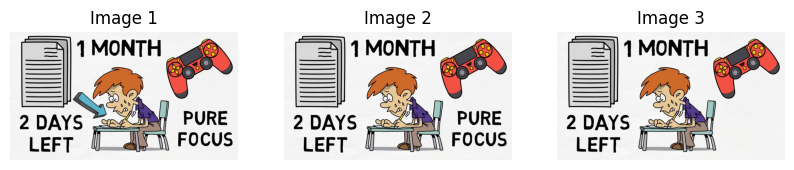


  The text chunk 2: to ext inguish it as fast as possible . so that becomes your primary focus . when your house is burning down , you don 't procrastin ate and waste your time on un important things . you don 't check email for just 1 0 minutes . you don 't have a quick scroll through twitter or instagram . nor do you think about playing video games . no , those things that usually make up
  


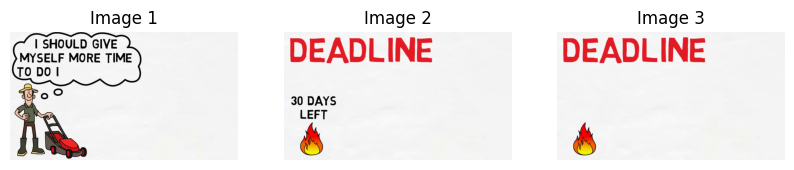


  The text chunk 3: used to create better quality videos for you guys , and it allows me to keep the content free . thank you so much for your support . also make sure you 're subscribed and hit that little bell icon next to my channel 's name . it will no tify you whenever i post a new video that will make you better than yesterday . <|endoftext|>
  


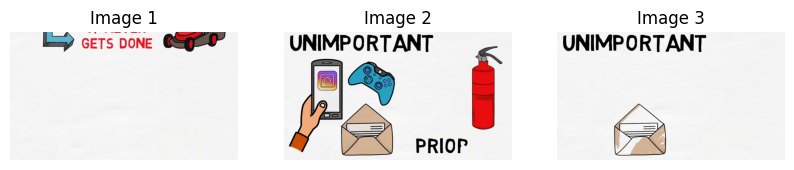


  The text chunk 4: a huge part of your procrastination become secondary and un important . instead , extingui shing that fire becomes your number one priority . in other words , because your deadline is so close , or because the fire is so big , you prioritize your tasks much better . you can 't afford to procrastin ate or get lost in un important details , like most people tend to do . instead , you 're fully
  


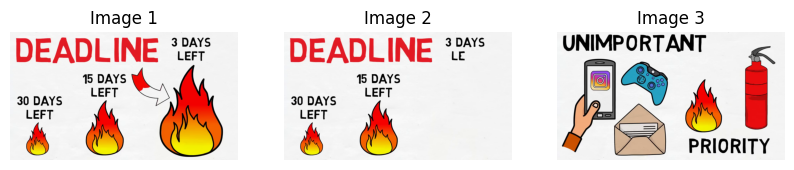


  The text chunk 5: the end result of a shorter deadline is actually of ten times better , because you 're not distracted and you have greater focus . however , you should be reasonable with the time frame of the deadlines . if you know something will take a week to complete , don 't set the deadline for tomorrow . this may sound obvious , but it is something people do when they first hear about the parkinson 's
  


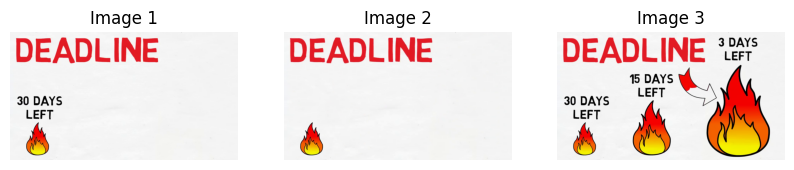

In [64]:
# Data visualization of the text and images
for i, text_index in enumerate(random_text_indices):
  plt.figure(figsize = (10, 8))

  # Displaying the text chunk
  print(f"""
  The text chunk {i + 1}: {' '.join([tokenizer.decode([token]) for token in transcription_chunks[text_index]])}
  """)

  # Displaying the similar iamges
  for j, image_idx in enumerate(text_to_images_similarities[i]):
    image = Image.open(image_paths[image_idx])
    plt.subplot(1, 3, j + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'Image {j + 1}')

  plt.show()

Query Embedding Techniques

# Step 9- Retrival System

In [65]:
# Let's define a query
query = 'Which cognitive biases are discussed?'

In [67]:
# Tokenizing the query
query_tokens = tokenizer(query,
                         return_tensors = 'pt',
                         padding = True)['input_ids']

In [70]:
# Generate the query embeddings inthe join embedding space
# Use CLIP model
# We are going ti find the most similar text features and the we are going to compare it with what we have
with torch.no_grad():
  query_embedding = model.get_text_features(
      input_ids = query_tokens
  ).cpu().numpy().flatten()
print(f'The shape of the query embedding is {query_embedding.shape}')

The shape of the query embedding is (512,)


No we will find what kind of text embedding are most simillar to our query embedding.

Calculating Cosine Similarity for Query and Text

In [72]:
[query_embedding]

[array([-2.85466224e-01,  2.59570450e-01, -5.34280054e-02,  1.63332835e-01,
        -1.24741063e-01,  8.69131982e-02, -1.88379079e-01,  1.81849450e-02,
        -4.25396264e-02,  4.90603566e-01, -1.76755294e-01, -1.11782998e-02,
        -2.34368369e-02, -4.21317399e-01, -2.18052998e-01,  2.04266265e-01,
        -2.33517423e-01, -2.85849214e-01, -2.79338658e-01,  3.03727806e-01,
         5.30763268e-02,  5.13616651e-02,  4.02442038e-01, -1.32528409e-01,
         1.41627148e-01, -3.41661274e-02,  2.58724749e-01,  4.85543907e-02,
        -8.09440017e-03,  3.45707536e-02,  2.08615139e-01, -3.44614267e-01,
        -1.51559711e-01,  4.72428679e-01,  4.55093503e-01, -1.19771093e-01,
        -7.20617294e-01,  1.03781350e-01, -1.01972230e-01, -1.75007373e-01,
        -3.33955176e-02,  9.58405435e-04, -4.35772359e-01,  5.15997469e-01,
        -2.88490206e-01,  5.66869229e-02, -1.19453855e-01,  1.88121349e-01,
         3.80144864e-02,  2.87589729e-02, -4.30798754e-02,  1.10787317e-01,
        -3.9

In [76]:
# Compute the cosine similarity between the query and the transcripts
text_similarities = cosine_similarity([query_embedding], text_embedding_np)[0]
text_similarities

array([0.7514169 , 0.619917  , 0.5645924 , 0.30731794, 0.41566634,
       0.4374284 , 0.318515  , 0.26505205, 0.348696  , 0.45180556,
       0.22160655, 0.54411453, 0.35618794, 0.4249993 , 0.26822615,
       0.58212537], dtype=float32)

In [80]:
# What are the most relevant text chunks to our query
# Define how many chunks we want
top_k_texts = 10

# Retrieve the indices of the top-k most similar text_chunks
top_k_text_indices = text_similarities.argsort()[-top_k_texts:][::-1]
top_k_text_indices

array([ 0,  1, 15,  2, 11,  9,  5, 13,  4, 12])

In [88]:
# Retrieve the closest images for each text chunk
top_k_images_indices = []
images_per_chunk = 2

for idx in top_k_text_indices:
  similar_images = similarities[idx].argsort()[-images_per_chunk:][::-1]
  top_k_images_indices.append(similar_images)

# Remove any duplicates and limit to the top k images
top_k_images_indices = list(set([item for sublist in top_k_images_indices for item in sublist]))
print(f'The total images indices are {len(top_k_images_indices)}')

The total images indices are 17


GenAI Model Setup for Multimodal Tasks

# Step 10 - Generation System

In [89]:
import base64

In [91]:
# Combining the retrieve text chunks
retrieved_text = []
for idx in top_k_text_indices:
  retrieved_text.append(tokenizer.decode(transcription_chunks[idx]))
retrieved_text = ' '.join(retrieved_text)
retrieved_text

"<|startoftext|>let me tell you a quick story . back when i was in high school , our teacher wanted us to write an essay . but because it was supposed to be a longer paper , he gave us one whole month to finish it . i was a massive procrastinator back then and since the deadline was so far away , i didn 't even think about starting writing yet . instead , i decided my time was better spent playing video games . days passed and the deadline was coming closer and closer , but i hadn 't written a single word . about two days before we had to turn in our essay , i realized the deadline was so close that i might not be able to finish in time . this is when i went into full - on panic mode . with only two days left used to create better quality videos for you guys , and it allows me to keep the content free . thank you so much for your support . also make sure you 're subscribed and hit that little bell icon next to my channel 's name . it will notify you whenever i post a new video that wil

In [92]:
# Convert the images and append them
base64frames = []
for idx in top_k_images_indices:
  image_path = image_paths[idx]
  with open(image_path, 'rb') as image_file:
    base64_image = base64.b64encode(image_file.read()).decode('utf-8')
    base64frames.append(base64_image)
base64frames

Output hidden; open in https://colab.research.google.com to view.

In [93]:
# Define the model and system prompt
MODEL = 'gpt-4o-mini'
system_prompt = """
You are an expert teacher that sumarises visual and tracribed content
"""

Building a GenAI Model

In [102]:
# Perare the user message content
user_message_content = [
    'These are the frames from the video',
    *map(lambda x: {'type': 'image_url',
                    'image_url': {'url': f'data:image/jpg;base64,{x}',
                                  'detail': 'high'}},
                    base64frames),
    {'type': 'text',
     'text': retrieved_text}
]

In [103]:
# Call the OpenAI API to generate a summary
response = client.chat.completions.create(
    model = MODEL,
    messages = [
        {'role': 'system', 'content': system_prompt},
        {'role': 'user', 'content': user_message_content},
    ],
    temperature = 0.3,
)

In [104]:
# Generate the response
generated_response = response.choices[0].message.content
print(generated_response)

The video discusses the concept of procrastination and time management through a personal story about writing an essay in high school. The narrator shares their experience of having a month to complete the assignment but delaying it in favor of playing video games. As the deadline approached, panic set in, leading to intense focus on completing the essay just two days before it was due. 

Key points include:

1. **Parkinson's Law**: This principle states that "work expands to fill the time available for its completion." If you give yourself too much time, you may waste it on unimportant tasks.

2. **Procrastination**: The narrator emphasizes that extra time can lead to procrastination, which often results in lower quality work. 

3. **Focus and Prioritization**: When faced with a tight deadline, the narrator was able to prioritize the essay, blocking out distractions and focusing solely on the task at hand.

4. **Deadlines**: Setting reasonable deadlines can enhance productivity. A sho

# Wrap it up

## Mutimodal RAG

First we learned how to combine different types of data into a asingle, AI system.

Now you create models that inderstand and generate content across different media just like humans.

## Python Set Up

We actively set up Python to handle diverse data types. We mastered extrating, compressing and prepping audio for analysis.

## Whisper model

We mastered the whisper model, turning audio into text. This is a big win for working with spoken language and a major step towards integrating audio into our models.

## Images and text Alignment with CLIP and Contrastive Learning

We created embeddings for images and text and match them up with Cosine similarity.

## Multimodal RAG Models

We brought everything together with our multimodal RAG. We built it, we learnt how to fine tume it, used prompts, even cpmbine different outputs.